<a href="https://www.kaggle.com/code/burakaka/google-stock-price-lstm-ipynb?scriptVersionId=214357368" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/google-stock-price/GOOG.csv")





In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,4858.0,4.147717e+01,3.859069e+01,2.470490,1.284660e+01,2.649996e+01,5.736725e+01,1.518635e+02
High,4858.0,4.191706e+01,3.903176e+01,2.534002,1.295419e+01,2.672827e+01,5.802850e+01,1.521000e+02
Low,4858.0,4.105549e+01,3.819302e+01,2.390042,1.271241e+01,2.628932e+01,5.696225e+01,1.498875e+02
Close,4858.0,4.149440e+01,3.861811e+01,2.490913,1.283464e+01,2.653750e+01,5.761125e+01,1.507090e+02
Adj Close,4858.0,4.149440e+01,3.861811e+01,2.490913,1.283464e+01,2.653750e+01,5.761125e+01,1.507090e+02
Volume,4858.0,1.189152e+08,1.512424e+08,158434.000000,2.854912e+07,6.168836e+07,1.467329e+08,1.650833e+09


In [5]:
stock_prices=pd.DataFrame(df["Close"])

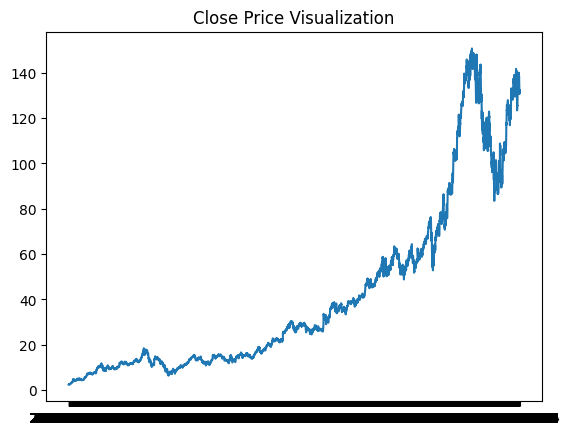

In [6]:
plt.title("Close Price Visualization")
plt.plot(df.Date,df.Close)

In [7]:

close = df['Close'].values.reshape(-1, 1)



In [8]:
def create_dataset(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 60  
X, Y = create_dataset(close, look_back)

split = int(len(X) * 0.98)
val_split=int(len(X) * 0.99)
X_train, X_test = X[:split], X[split:val_split]
Y_train, Y_test = Y[:split], Y[split:val_split]
X_val=X[val_split:]
Y_val=X[val_split:]



In [9]:
X_train.shape

(4702, 60, 1)

In [10]:
X_test.shape

(48, 60, 1)

In [11]:
X_val.shape

(48, 60, 1)

In [12]:
X_train.shape

(4702, 60, 1)

In [13]:
Y_train.shape

(4702, 1)

In [14]:
Y_test.shape

(48, 1)

In [15]:
X_train.reshape(-1, 1).shape

(282120, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
y_train_scaled = scaler.transform(Y_train)

X_test_scaled = scaler.transform(X_test.reshape(-1, 1))
y_test_scaled = scaler.transform(Y_test)


In [17]:
X_train_scaled.shape

(282120, 1)

In [18]:
X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])

X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [19]:
X_train_scaled.shape

(4702, 60, 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units = 30, return_sequences=True
              ,input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, return_sequences=False))
model.add(Dropout(0.3))




model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60)                  │          21,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,741 (100.55 KB)

 Trainable params: 25,741 (100.55 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, Y_train, validation_data=(X_val,Y_val) ,epochs=100)


Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 2477.9900 - mae: 33.9778 - val_loss: 13826.5596 - val_mae: 117.4874
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1978.0614 - mae: 27.6675 - val_loss: 12041.4141 - val_mae: 109.6273
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1473.8561 - mae: 21.2836 - val_loss: 10526.5889 - val_mae: 102.4857
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1205.4894 - mae: 18.3667 - val_loss: 9222.1572 - val_mae: 95.9108
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1006.2101 - mae: 16.1116 - val_loss: 8114.6001 - val_mae: 89.9518
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 860.3944 - mae: 14.6468 - val_loss: 7148.7505 - val_mae: 84.4125
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 683.8856 - mae: 12.2654 - val_loss: 6304.4165 - val_mae: 79.2537
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 587.9189 - mae: 11.1619 - val_loss: 5559.2173 

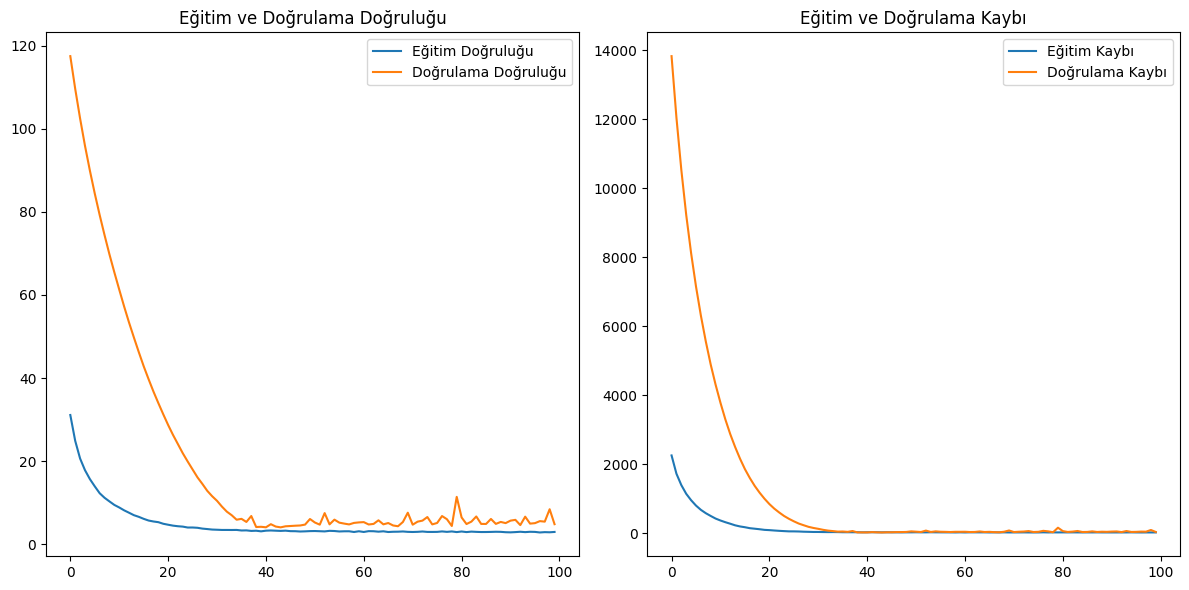

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_mae'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')

plt.legend()

plt.tight_layout()
plt.show()


In [24]:
model.evaluate(X_val,Y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.3170 - mae: 4.9577 


[37.72572326660156, 4.8072638511657715]

In [25]:
y_pred=model.predict(X_train)

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [26]:
y_pred.shape

(4702, 1)

In [27]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


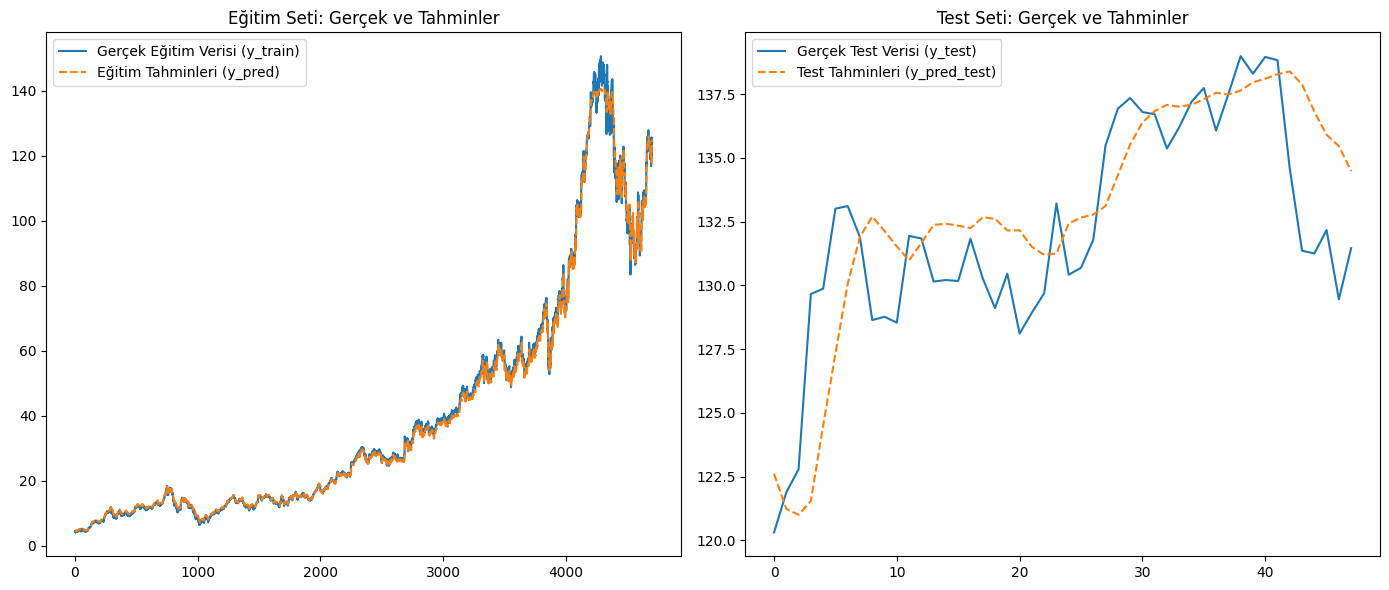

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  
plt.plot(Y_train, label='Gerçek Eğitim Verisi (y_train)')
plt.plot(y_pred_train, label='Eğitim Tahminleri (y_pred)', linestyle='--')
plt.title('Eğitim Seti: Gerçek ve Tahminler')

plt.legend()

plt.subplot(1, 2, 2)  
plt.plot(Y_test, label='Gerçek Test Verisi (y_test)')
plt.plot(y_pred_test, label='Test Tahminleri (y_pred_test)', linestyle='--')
plt.title('Test Seti: Gerçek ve Tahminler')

plt.legend()

plt.tight_layout()
plt.show()
